<a href="https://colab.research.google.com/github/MadeaRiggs/AIPlanet-Data-Science/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Description:**

`ID_Patient_Care_Situation`: Care situation of a patient during treatment

`Diagnosed_Condition`: The diagnosed condition of the patient

`ID_Patient`: Patient identifier number

`Treatment_with_drugs`: Class of drugs used during treatment

`Survived_1_year`: If the patient survived after one year (0 means did not survive; 1 means survived)

`Patient_Age`: Age of the patient

`Patient_Body_Mass_Index`: A calculated value based on the patient’s weight, height, etc.

`Patient_Smoker`: If the patient was a smoker or not

`Patient_Rural_Urban`: If the patient stayed in Rural or Urban part of the country

`Previous_Condition`: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [ ]:
pharma_data= pharma_data.dropna()

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21849 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  21849 non-null  int64  
 1   Diagnosed_Condition        21849 non-null  int64  
 2   Patient_ID                 21849 non-null  int64  
 3   Treated_with_drugs         21849 non-null  object 
 4   Patient_Age                21849 non-null  int64  
 5   Patient_Body_Mass_Index    21849 non-null  float64
 6   Patient_Smoker             21849 non-null  object 
 7   Patient_Rural_Urban        21849 non-null  object 
 8   Patient_mental_condition   21849 non-null  object 
 9   A                          21849 non-null  float64
 10  B                          21849 non-null  float64
 11  C                          21849 non-null  float64
 12  D                          21849 non-null  float64
 13  E                          21849 non-null  flo

In [ ]:
pharma_data['Treated_with_drugs'].nunique()

32

In [ ]:
pharma_data['Patient_Smoker'].nunique()

2

In [ ]:
pharma_data[(pharma_data['Patient_Smoker']== "Cannot say")]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year


In [ ]:
pharma_data['Patient_Rural_Urban'].nunique()

2

In [ ]:
pharma_data['Patient_mental_condition'].nunique()

1

In [ ]:
#converting text to numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
pharma_data['Patient_Smoker'] = label_encoder.fit_transform(pharma_data['Patient_Smoker'])
pharma_data['Patient_Rural_Urban']= label_encoder.fit_transform(pharma_data['Patient_Rural_Urban'])
pharma_data['Patient_mental_condition']= label_encoder.fit_transform(pharma_data['Patient_mental_condition'])
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,0,0,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
y= pharma_data['Survived_1_year']
pharma_data.drop(['Patient_ID', 'Survived_1_year', 'Treated_with_drugs', 'ID_Patient_Care_Situation', 'A', 'B', 'C', 'D', 'E', 'F', 'Z'], axis=1, inplace=True)
X= pharma_data

In [ ]:
X.columns

Index(['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'Number_of_prev_cond'],
      dtype='object')

In [ ]:
#create a Decision Tree Classifier
tree_model= DecisionTreeClassifier(random_state=0, max_depth=5)

In [ ]:
#split dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
#fit model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
#do predictions on test data
y_pred= tree_model.predict(X_test)
print(y_pred)

[1 1 0 ... 1 1 0]


In [ ]:
#calculate accuracy
tree_model.score(X_test, y_test)

0.7363844393592678

In [ ]:
#finding F1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8127032300021678

In [ ]:
#converting text to numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
test_data['Patient_Smoker'] = label_encoder.fit_transform(test_data['Patient_Smoker'])
test_data['Patient_Rural_Urban']= label_encoder.fit_transform(test_data['Patient_Rural_Urban'])
test_data['Patient_mental_condition']= label_encoder.fit_transform(test_data['Patient_mental_condition'])
test_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,0,1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,28,29.106314,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,DX1,4,20.616673,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,DX1 DX3 DX4 DX5,20,24.727357,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,DX4,33,17.517426,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


In [ ]:
test_data.drop(['Patient_ID', 'Treated_with_drugs', 'ID_Patient_Care_Situation', 'A', 'B', 'C', 'D', 'E', 'F', 'Z'], axis=1, inplace=True)
test= test_data

In [ ]:
ss= pd.read_csv("/content/drive/MyDrive/Sample_Submission.csv")

<ipython-input-58-8e479fc68d9e>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sub_file.predictions = predictions
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


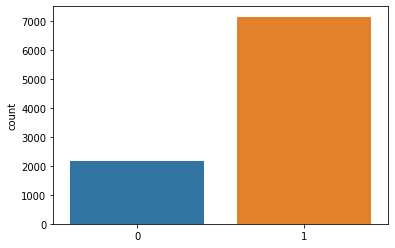

In [ ]:
#make predictions on test file
predictions=tree_model.predict(test)

#create submission file
sub_file= ss.copy()
sub_file.predictions = predictions

#check distribution for the predictions
import seaborn as sns
sns.countplot(predictions) 

sub_file.to_csv("submission.csv",index=False) 